In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

In [2]:
df=pd.read_excel('Project_dataset.xlsx',sheet_name='Project_dataset',header=None)

In [3]:
#import sklearn package
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [4]:
#sperate training and test dataset
X=df.iloc[:,:].values
#X_train, X_test=train_test_split(X,test_size=0.3,random_state=0)

In [5]:
from sklearn import preprocessing
import numpy as np


In [6]:
#Standarize to (0,1)
X=preprocessing.scale(X)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [7]:
#calculating covar matrix
cov_mat=np.cov(X.T)
cov_mat.shape

(209, 209)

In [8]:
#calculating eigen_vals and eigen_vecs
eigen_vals, eigen_vecs=np.linalg.eig(cov_mat)


In [48]:
#variance explained ratios
tot=sum(eigen_vals) # sumation of eigen_value
var_exp=[(i/tot) for i in sorted(eigen_vals,reverse=True)] # ratio of each eigen_value
cum_var_exp=np.cumsum(var_exp)


In [10]:
#plot
import matplotlib.pyplot as plt
plt.bar(range(len(eigen_vals)),var_exp,alpha=0.5, label='individual explained variance')
plt.step(range(len(eigen_vals)), cum_var_exp, where='post', label='cumulative explained variance') 
plt.ylabel('Explained variance ratio') 
plt.xlabel('Principal components') 
plt.legend(loc='best') 
plt.show()

<Figure size 640x480 with 1 Axes>

In [11]:
#as the plot says, less than 50 PCs can explain 80% of the varaince
from sklearn.decomposition import PCA
pca=PCA(n_components=20) # chose 20 PCs for following analysis
X_pca=pca.fit_transform(X)
X_pca.shape

(552, 20)

In [12]:
# covariance matrix of trimmed dataset
cov_mat=np.cov(X_pca.T)
cov_mat_inv=np.linalg.inv(cov_mat)
cov_mat.shape

(20, 20)

In [13]:
# X bar matrix
X_bar=[X_pca[:,i].mean() for i in range(0,20)]

In [14]:
# calculating X_j-X_bar
X_sub=[X_pca[i,:]-X_bar for i in range(len(X_pca))]
X_sub=np.asmatrix(X_sub)

In [40]:
# calculating T^2 statistics
T_square=[np.float(np.matmul(np.matmul(X_sub[i,:],cov_mat_inv),X_sub[i,:].T)) for i in range(len(X_sub))]

In [26]:
# if we use alaph = 0.05 then 
from scipy.stats import chi2
UCL=chi2.isf(0.05,20)
print(UCL)

31.41043284423092


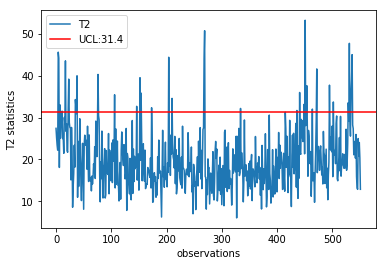

In [49]:
# ploting

plt.plot(range(len(X_pca)),T_square, label='T2')
plt.axhline(y=UCL,color='r',label='UCL:31.4')
plt.xlabel('observations') 
plt.ylabel('T2 statistics')
plt.legend(loc='best') 
plt.show()